In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from time import strptime, mktime, ctime
import re
from time import strptime, mktime
from dateutil.parser import isoparse
import datetime

In [11]:
dataset_datetime = isoparse("2021-04-30")
print(dataset_datetime)
# Read Data
data_raw = pd.read_csv("tracks.csv", low_memory=False)
data_raw.describe()

2021-04-30 00:00:00


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [12]:
# Filter Relevant Columns
wanted_columns = ["popularity", "duration_ms", "explicit", "release_date", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
processed_data = data_raw.loc[:, wanted_columns]

In [13]:
# Convert "release_date" timestamps to "days_since_release"

newest = datetime.datetime(1, 1, 1)
oldest = datetime.datetime(2023, 1, 1)

datetimes = []
times_since_release = []
for row_idx, row in processed_data.iterrows():
    datetime_str = str(row["release_date"])

    if re.search("^[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]$", datetime_str):
        pass
    elif re.search("^[0-9][0-9][0-9][0-9]$", datetime_str):
        datetime_str += "-06-15"
    elif re.search("^[0-9][0-9][0-9][0-9]-[0-9][0-9]$", datetime_str):
        datetime_str += "-15"
    else:
        raise ValueError
    
    release_datetime = isoparse(datetime_str)
    time_since_release = (dataset_datetime - release_datetime).total_seconds()

    #print(datetime_str)
    newest = max(newest, release_datetime)
    oldest = min(oldest, release_datetime)
    
    if time_since_release < 0:
        print(f"{row['name']}, {release_datetime}, {datetime_str}")
    
    times_since_release.append(time_since_release/(60*60*24))
processed_data["days_since_release"] = times_since_release
print(f"Newest: {newest}\nOldest: {oldest}")
processed_data.describe()

Newest: 2021-04-16 00:00:00
Oldest: 1900-01-01 00:00:00


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,days_since_release
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382,11815.030353
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162,8348.009479
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000,4970.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000,10500.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000,17135.250000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,44314.000000


In [14]:
processed_data.drop("release_date", axis=1, inplace=True)

(586672, 16)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,days_since_release
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382,11815.030353
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162,8348.009479
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000,4970.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000,10500.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000,17135.250000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,44314.000000


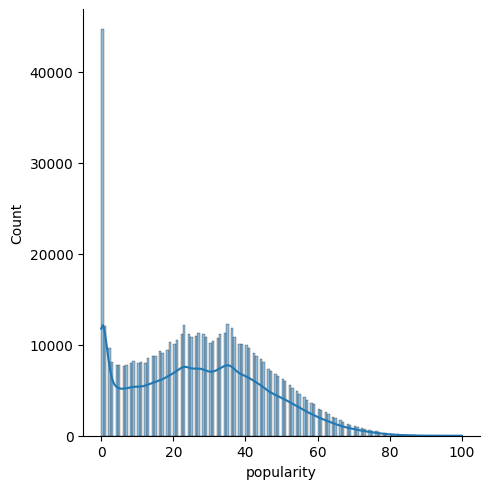

In [15]:
#Remove rows with empty values
processed_data.replace(["", None], np.nan, inplace=True)
processed_data.dropna(inplace=True)

# Display the distribution of popularity
sns.displot(processed_data["popularity"], kde=True)
processed_data.reset_index(drop=True, inplace=True)
print(processed_data.shape)
processed_data.describe()

In [16]:
"""#Remove Outliers
processed_data = processed_data[processed_data["Popularity"] < 50000]

sns.displot(processed_data["Popularity"], kde=True)
print(processed_data.shape)
processed_data.describe()"""

'#Remove Outliers\nprocessed_data = processed_data[processed_data["Popularity"] < 50000]\n\nsns.displot(processed_data["Popularity"], kde=True)\nprint(processed_data.shape)\nprocessed_data.describe()'

In [17]:
# Normalize the features
processed_data = processed_data.astype("float64")
processed_data.iloc[:, 1:] = (processed_data.iloc[:, 1:] - processed_data.iloc[:, 1:].mean())/processed_data.iloc[:, 1:].std()  # z-score standardization w/ mean:0 std:1
#processed_data.iloc[:, 1:] = (processed_data-processed_data.min()) / (processed_data.max()-processed_data.min()) # min-max normalization w/ min:0 max:1
processed_data.replace(["", None, np.nan], 0, inplace=True)


processed_data.reset_index(drop=True, inplace=True)
print(processed_data.shape)
processed_data.describe()

(586672, 16)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,days_since_release
count,586672.000000,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05,5.866720e+05
mean,27.570053,-1.007670e-17,-1.003794e-16,-4.205083e-17,-1.173354e-16,1.244084e-16,7.538144e-17,-3.689621e-16,5.241820e-17,1.686878e-16,-3.092771e-16,2.036655e-16,-1.386515e-16,-2.172303e-16,2.910615e-16,-4.028741e-16
std,18.370642,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-1.500767e+00,-1.791782e+00,-2.147536e-01,-3.393045e+00,-2.151594e+00,-1.483653e+00,-9.783990e+00,-1.389535e+00,-5.829224e-01,-1.289608e+00,-4.251197e-01,-1.160636e+00,-2.143402e+00,-3.980125e+00,-8.186158e+00
25%,13.000000,-7.931161e-01,-4.343623e-01,-2.147536e-01,-6.658161e-01,-7.900670e-01,-9.153780e-01,-5.275614e-01,-1.389535e+00,-3.939210e-01,-1.011828e+00,-4.251197e-01,-6.273411e-01,-8.006044e-01,-7.682023e-01,2.675986e-01
50%,27.000000,-3.103064e-02,-1.198027e-01,-2.147536e-01,8.071022e-02,2.764341e-02,-6.296558e-02,1.892326e-01,7.196641e-01,-3.366646e-01,-7.987326e-02,-4.250279e-01,-4.065361e-01,4.543596e-02,-3.631409e-02,2.675986e-01
75%,41.000000,7.310549e-01,2.672637e-01,-2.147536e-01,7.369309e-01,8.175675e-01,7.894468e-01,7.317404e-01,7.196641e-01,-1.587809e-01,9.607283e-01,-3.893342e-01,3.475642e-01,8.410243e-01,5.999220e-01,2.675986e-01
max,100.000000,3.942701e+00,4.260913e+01,4.656492e+00,2.573145e+00,1.817873e+00,1.641859e+00,3.061714e+00,7.196641e-01,4.814737e+00,1.565596e+00,3.322053e+00,4.264546e+00,1.737517e+00,4.297664e+00,2.381038e+00


In [18]:
# Save as another csv file
processed_data.to_csv("processed_database_2.csv", index=False)